In [1]:
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
import numpy as np

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from datetime import datetime
import requests
from io import StringIO

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [2]:
xrfdata=pd.read_csv (r'L:\D\DuncanF\XRFCalMontneyTrim.csv')

In [3]:
xrfdf=DataFrame(xrfdata)

In [4]:
xrfdf=xrfdf.set_index('Depth')

In [5]:
xrfdf.head()

,Mg,Al,Si,P,K,Ca,Ti,V,Cr,Mn,...,Apatite,Anhydrite,Calcite,Dolomite,Ankerite,Pyrite,Barite,Framework,Clay,Carbonate
Depth,,,,,,,,,,,,,,,,,,,,,
2345,6.120712,2.861879,18.117898,0.428135,2.087081,13.862939,0.227094,0.040024,0.007204,0.026867,...,2.072558,0.0,0.0,49.760571,0,3.957603,0.095002,33.869404,9.158831,49.760571
2350,7.222694,2.439930,17.184841,0.282637,2.337940,12.941496,0.205795,0.084936,0.007936,0.021952,...,1.406764,0.0,0.0,50.693174,0,3.829088,0.133145,32.998781,9.350348,50.693174
2355,7.261367,2.013497,16.474904,0.103987,1.997685,14.394153,0.197790,0.097261,0.005974,0.025454,...,0.514187,0.0,0.0,56.014485,0,3.162840,0.083465,32.559620,6.377291,56.014485
2360,7.871665,2.193055,16.004597,0.229678,2.080914,14.351416,0.216679,0.108510,0.011155,0.028489,...,1.121860,0.0,0.0,55.167941,0,3.877463,0.124101,30.651187,7.483342,55.167941
2365,7.514818,2.337002,15.576592,0.165923,2.121465,14.245262,0.209221,0.119666,0.003891,0.025016,...,0.831747,0.0,0.0,56.198999,0,3.374561,0.115066,31.218697,6.907077,56.198999


In [6]:
elements=xrfdf.drop(['Qtz','K-spar','Plag', 'Illite', 'Mica', 'Chlorite', 'Apatite', 'Anhydrite','Calcite', 'Dolomite','Ankerite','Pyrite','Barite','Framework','Clay','Carbonate'],axis=1)

Text(0.5, 1.0, 'Predicted Quartz value  R2: 0.9642945905018049')

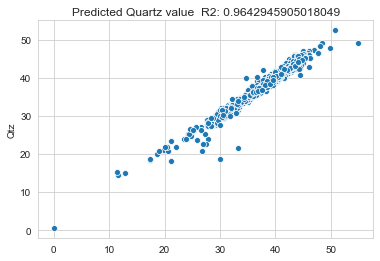

In [7]:
Qtz=xrfdf.Qtz
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Qtz)
lregQtz=LinearRegression()
lregQtz.fit(x_train,y_train)
predict_train=lregQtz.predict(x_train)
predict_test=lregQtz.predict(x_test)
predict_test[predict_test < 0] = 0 # zero out negative numbers
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Quartz value  R2: ' + str(r2_score(predict_test, y_test)))

In [8]:
rtest=elements.copy()
rtest['Mineral']=Qtz

rtest.corrwith(rtest['Mineral'],axis=0, method='pearson')

Mg        -0.606220
Al         0.434578
Si         0.805781
P         -0.254531
K          0.349331
Ca        -0.731258
Ti         0.484576
V         -0.152438
Cr         0.154295
Mn        -0.415363
Fe         0.135427
Ni         0.048007
Cu         0.162960
Zn        -0.133593
As        -0.138649
Se        -0.158427
Rb         0.529571
Sr        -0.280177
Y          0.331387
Zr         0.647944
Nb         0.239756
Mo        -0.335845
Ba        -0.013736
Pb         0.084521
U         -0.208748
Mineral    1.000000
dtype: float64

Text(0.5, 1.0, 'Predicted K Spar value  R2: 0.9660008565551896')

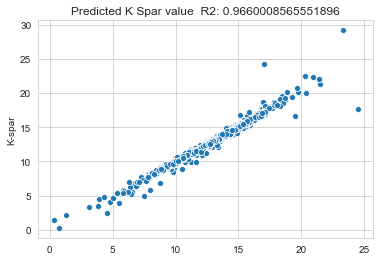

In [9]:
Kspar=xrfdf['K-spar']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Kspar)
lregKspar=LinearRegression()
lregKspar.fit(x_train,y_train)
predict_train=lregKspar.predict(x_train)
predict_test=lregKspar.predict(x_test)
predict_test[predict_test < 0] = 0 # zero out negative numbers
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted K Spar value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Polynomial Predicted K Spar value  R2: 0.9957976625111978')

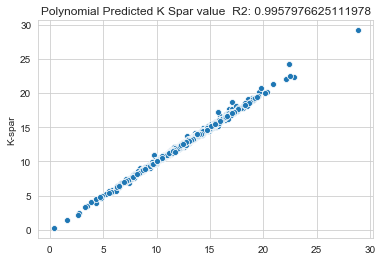

In [10]:
degree=2
polyregKspar=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyregKspar.fit(x_train,y_train)
predict_train=polyregKspar.predict(x_train)
predict_test=polyregKspar.predict(x_test)
predict_test[predict_test < 0] = 0
predict_test[predict_test > 100] = 100
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Polynomial Predicted K Spar value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Plag value  R2: -0.3909565696266577')

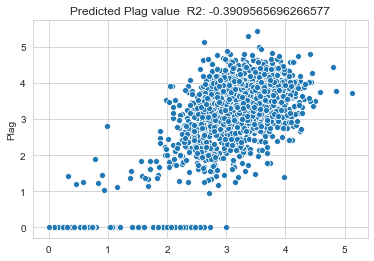

In [11]:

Plag=xrfdf.Plag
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Plag)
lregPlag=LinearRegression()
lregPlag.fit(x_train,y_train)
predict_train=lregPlag.predict(x_train)
predict_test=lregPlag.predict(x_test)
predict_test[predict_test < 0] = 0 # zero out negative numbers
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Plag value  R2: ' + str(r2_score(predict_test, y_test)))


Text(0.5, 1.0, 'Predicted Illite value  R2: 0.9815339396952394')

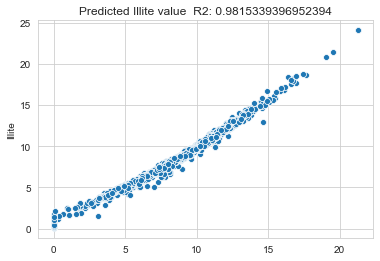

In [12]:
Illite=xrfdf.Illite
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Illite)
lregIllite=LinearRegression()
lregIllite.fit(x_train,y_train)
predict_train=lregIllite.predict(x_train)
predict_test=lregIllite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Illite value')
ax.set_title('Predicted Illite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Polynomial Predicted Illite value  R2: 0.9991171741961592')

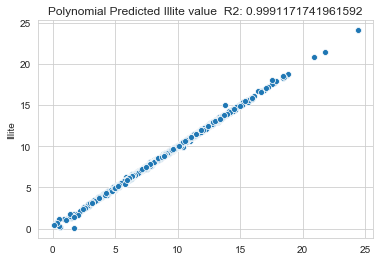

In [13]:
degree=2
polyregIllite=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyregIllite.fit(x_train,y_train)
predict_train=polyregIllite.predict(x_train)
predict_test=polyregIllite.predict(x_test)
predict_test[predict_test < 0] = 0
predict_test[predict_test > 100] = 100
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Polynomial Predicted Illite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Mica value  R2: 0.5417199946832931')

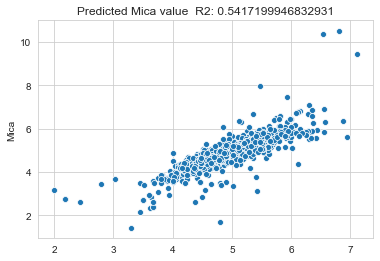

In [14]:
Mica=xrfdf.Mica
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Mica)
lregMica=LinearRegression()
lregMica.fit(x_train,y_train)
predict_train=lregMica.predict(x_train)
predict_test=lregMica.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Mica value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Chlorite value  R2: 0.6778025880662931')

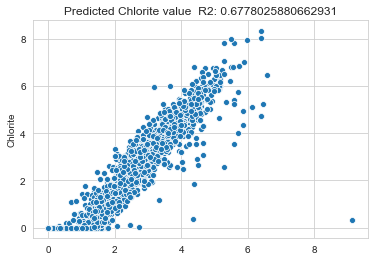

In [15]:
Chlorite=xrfdf.Chlorite
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Chlorite)
lregChlorite=LinearRegression()
lregChlorite.fit(x_train,y_train)
predict_train=lregChlorite.predict(x_train)
predict_test=lregChlorite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Chlorite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Apatite value  R2: 0.9954575816699508')

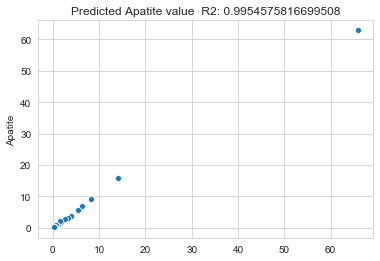

In [16]:
Apatite=xrfdf['Apatite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Apatite)
lregApatite=LinearRegression()
lregApatite.fit(x_train,y_train)
predict_train=lregApatite.predict(x_train)
predict_test=lregApatite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Apatite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Anhydrite value  R2: -0.7517177365493926')

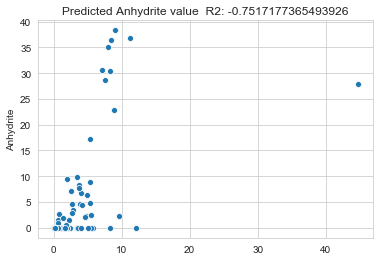

In [17]:
Anhydrite=xrfdf['Anhydrite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Anhydrite)
lregAnhydrite=LinearRegression()
lregAnhydrite.fit(x_train,y_train)
predict_train=lregAnhydrite.predict(x_train)
predict_test=lregAnhydrite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Anhydrite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Calcite value  R2: 0.6142796997745963')

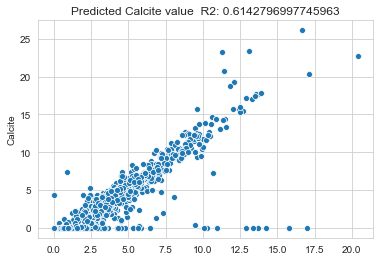

In [18]:
Calcite=xrfdf['Calcite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Calcite)
lregCalcite=LinearRegression()
lregCalcite.fit(x_train,y_train)
predict_train=lregCalcite.predict(x_train)
predict_test=lregCalcite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Calcite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Dolomite value  R2: 0.9081189211449944')

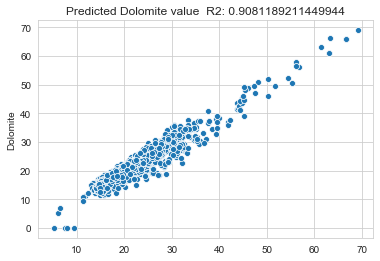

In [19]:
Dolomite=xrfdf['Dolomite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Dolomite)
lregDolomite=LinearRegression()
lregDolomite.fit(x_train,y_train)
predict_train=lregDolomite.predict(x_train)
predict_test=lregDolomite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Dolomite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Ankerite value  R2: 1.0')

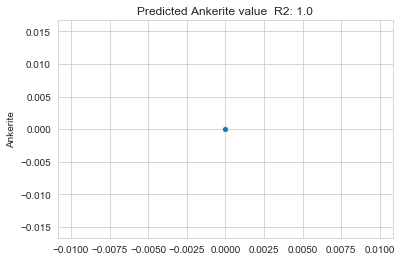

In [20]:
Ankerite=xrfdf['Ankerite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Ankerite)
lregAnkerite=LinearRegression()
lregAnkerite.fit(x_train,y_train)
predict_train=lregAnkerite.predict(x_train)
predict_test=lregAnkerite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Ankerite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Pyrite value  R2: 0.365012806950458')

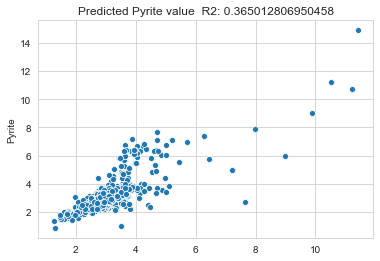

In [21]:
Pyrite=xrfdf['Pyrite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Pyrite)
lregPyrite=LinearRegression()
lregPyrite.fit(x_train,y_train)
predict_train=lregPyrite.predict(x_train)
predict_test=lregPyrite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Pyrite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Barite value  R2: 0.9980067389228141')

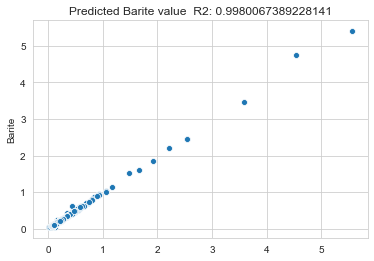

In [22]:
Barite=xrfdf['Barite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Barite)
lregBarite=LinearRegression()
lregBarite.fit(x_train,y_train)
predict_train=lregBarite.predict(x_train)
predict_test=lregBarite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Barite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Framework value  R2: 0.9648694350454519')

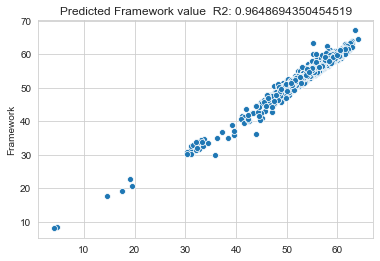

In [23]:
Framework=xrfdf['Framework']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Framework)
lregFramework=LinearRegression()
lregFramework.fit(x_train,y_train)
predict_train=lregFramework.predict(x_train)
predict_test=lregFramework.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Framework value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Clay value  R2: 0.8998536531084175')

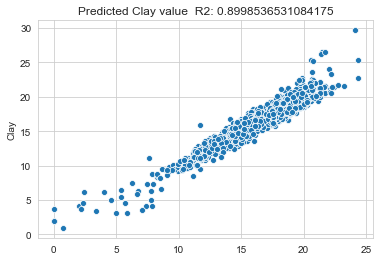

In [24]:
Clays=xrfdf['Clay']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Clays)
lregClays=LinearRegression()
lregClays.fit(x_train,y_train)
predict_train=lregClays.predict(x_train)
predict_test=lregClays.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Clay value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Carbonate value  R2: 0.9280301963768156')

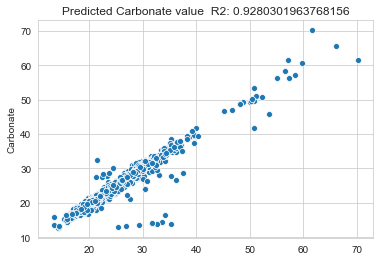

In [25]:
Carbonate=xrfdf['Carbonate']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Carbonate)
lregCarbonate=LinearRegression()
lregCarbonate.fit(x_train,y_train)
predict_train=lregCarbonate.predict(x_train)
predict_test=lregCarbonate.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Carbonate value  R2: ' + str(r2_score(predict_test, y_test)))

In [26]:

Montxrfdata=pd.read_csv (r'L:\D\DuncanF\16068117elements.csv')
Montxrfdf=DataFrame(Montxrfdata)
Montxrfdf=Montxrfdf.set_index('Depth')
Montxrfdf=Montxrfdf.divide(10000) # if its in ppm, otherwise leave it in percent. Everything above assumes percent
Montxrfdf.head()

,Mg,Al,Si,P,K,Ca,Ti,V,Cr,Mn,...,Se,Rb,Sr,Y,Zr,Nb,Mo,Ba,Pb,U
Depth,,,,,,,,,,,,,,,,,,,,,
2065.0,0.9593,3.2837,21.3694,0.0885,1.8532,8.1747,0.3754,0.0163,0.0063,0.0301,...,0.0003,0.0057,0.0106,0.0029,0.0246,0.0010,0.0023,0.0,0.0010,0.0006
2065.1,0.9173,3.6506,22.3548,0.0724,2.1037,6.4101,0.4119,0.0173,0.0056,0.0276,...,0.0002,0.0069,0.0105,0.0029,0.0281,0.0013,0.0026,0.0,0.0011,0.0006
2065.2,0.6369,3.7156,22.6005,0.0485,2.1347,6.3335,0.4315,0.0155,0.0061,0.0262,...,0.0002,0.0068,0.0109,0.0027,0.0258,0.0012,0.0021,0.0,0.0010,0.0004
2065.3,0.5964,3.6672,22.4317,0.0310,2.0931,6.8834,0.4028,0.0152,0.0052,0.0260,...,0.0002,0.0063,0.0107,0.0025,0.0243,0.0012,0.0016,0.0,0.0009,0.0005
2065.4,0.8267,4.3988,22.9846,0.0269,2.5287,5.1975,0.4615,0.0163,0.0079,0.0260,...,0.0002,0.0079,0.0098,0.0023,0.0247,0.0014,0.0023,0.0,0.0010,0.0004


In [27]:
Montxrfdf=Montxrfdf.dropna()
Results=DataFrame(index=Montxrfdf.index)
Results['Qtz'] = lregQtz.predict(Montxrfdf)
Results['Kspar'] = lregKspar.predict(Montxrfdf)
Results['Plag'] = lregPlag.predict(Montxrfdf)
Results['Illite'] = lregIllite.predict(Montxrfdf)
Results['Mica'] = lregMica.predict(Montxrfdf)
Results['Chlorite'] = lregChlorite.predict(Montxrfdf)
Results['Apatite'] = lregApatite.predict(Montxrfdf)
Results['Anhydrite'] = lregAnhydrite.predict(Montxrfdf)
Results['Calcite'] = lregCalcite.predict(Montxrfdf)
Results['Dolomite'] = lregDolomite.predict(Montxrfdf)
Results['Ankerite'] = lregAnkerite.predict(Montxrfdf)
Results['Pyrite'] = lregPyrite.predict(Montxrfdf)
Results['Barite'] = lregBarite.predict(Montxrfdf)
Results['Framework'] = lregFramework.predict(Montxrfdf)
Results['Clays'] = lregClays.predict(Montxrfdf)
Results['Carbonate'] = lregCarbonate.predict(Montxrfdf)
Results[Results < 0] = 0
Results.head()


,Qtz,Kspar,Plag,Illite,Mica,Chlorite,Apatite,Anhydrite,Calcite,Dolomite,Ankerite,Pyrite,Barite,Framework,Clays,Carbonate
Depth,,,,,,,,,,,,,,,,
2065.0,40.935332,5.708660,2.436422,10.123459,6.316684,0.0,0.521217,3.871976,17.211383,8.944487,0.0,4.444760,0.000129,48.844050,16.342538,25.028035
2065.1,43.137732,4.694822,2.350103,14.097824,6.802509,0.0,0.429621,3.452461,13.851486,8.688825,0.0,4.610066,0.003137,49.941660,19.256042,21.279712
2065.2,43.493142,5.474464,2.537954,13.671125,6.611737,0.0,0.343797,3.694216,14.726505,6.637342,0.0,4.681809,0.002527,51.134657,19.114774,20.127710
2065.3,42.656262,6.735707,2.697174,11.707072,6.206238,0.0,0.251958,3.708583,16.421854,5.934681,0.0,4.433624,0.000262,51.587157,18.022966,21.085629
2065.4,42.216664,6.349748,2.562526,16.562554,6.461659,0.0,0.304591,3.485699,11.902405,6.761137,0.0,4.739313,0.002947,50.776617,22.330173,17.347933


In [28]:
#Results.to_csv(r'L:\D\DuncanF\MontneyMinPred16068117.csv')